# Problem Statement

Statement: To build a machine learning model that will predict the loan status of the customer if they are eligible or not from previous dataset. There approval of loan depends on various factors like user's marital status, income, education, number of dependents, etc.

Type of ML Algorithm used: As their is labelled ouput is present in the dataset so, here the **Supervised Machine Learning Classification Algorithm** is used.

# Exploring the data

In [1]:
# the libraries are imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

Reading training and testing dataset

In [2]:
# training data
train = pd.read_csv("train.csv")

# testing data
test = pd.read_csv("test.csv")

In [3]:
# shape of data
train.shape

(614, 13)

In [4]:
# returns the first five records of the training dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# returns the description of the dataset
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#returns the summary of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# returns the columns name
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# returns the counts of unique values
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

There are 12 independent variables and 1 target variable in a dataset.

Independent variable:\
Gender -> Categorical Variable (Male/Female)\
Married -> Categorical Variable (Yes/No)\
Dependents -> Ordinal Variable\
Education -> Ordinal Variable (Graduate/Not Graduate)\
Self_Employed -> Categorical Variable (Yes/No)\
ApplicantIncome -> Numerical Variable\
CoapplicantIncome -> Numerical Variable\
LoanAmount -> Numerical Variable\
Loan_Amount_Term -> Numerical Variable\
Credit_History -> Categorical Variable (0.0/1.0)\
Property_Area -> Ordinal Variable (rural/semi urban/urban)

Target variable: \
Loan_Status -> Categorical Variable (Y/N)


# Univariate Analysis

Categorical & Ordinal Independent Variable

Bar chart

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

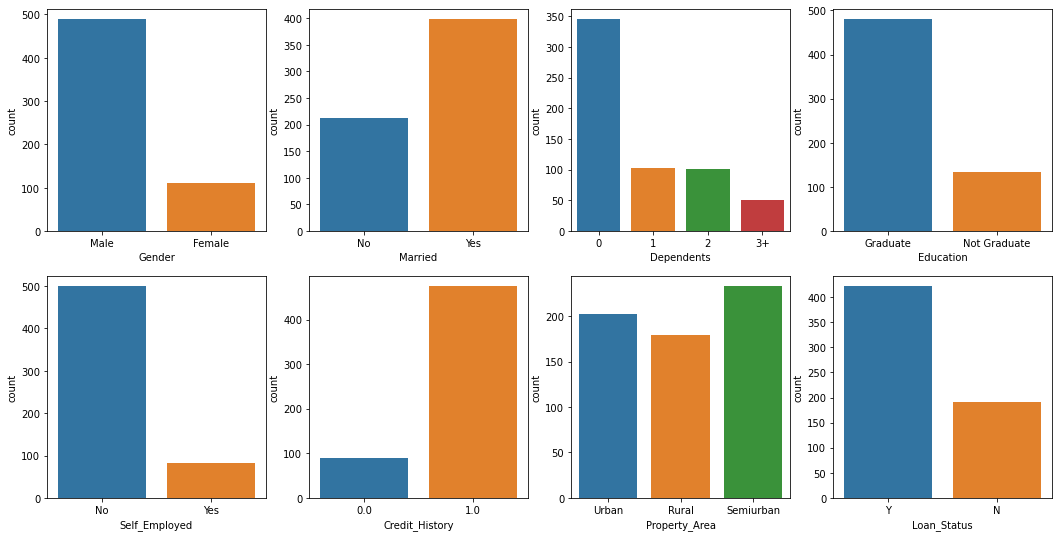

In [9]:
# bar graph for categorical variables
fig, ax = plt.subplots(2,4,figsize=(18,9))
sns.countplot(x = 'Gender',data = train, ax = ax[0][0])
sns.countplot(x = 'Married', data = train, ax = ax[0][1])
sns.countplot(x = 'Dependents', data = train, ax = ax[0][2])
sns.countplot(x = 'Education', data = train, ax = ax[0][3])
sns.countplot(x = 'Self_Employed', data = train, ax = ax[1][0])
sns.countplot(x = 'Credit_History', data = train, ax = ax[1][1])
sns.countplot(x = 'Property_Area', data = train, ax = ax[1][2])
sns.countplot(x = 'Loan_Status', data = train, ax = ax[1][3])

Pie chart

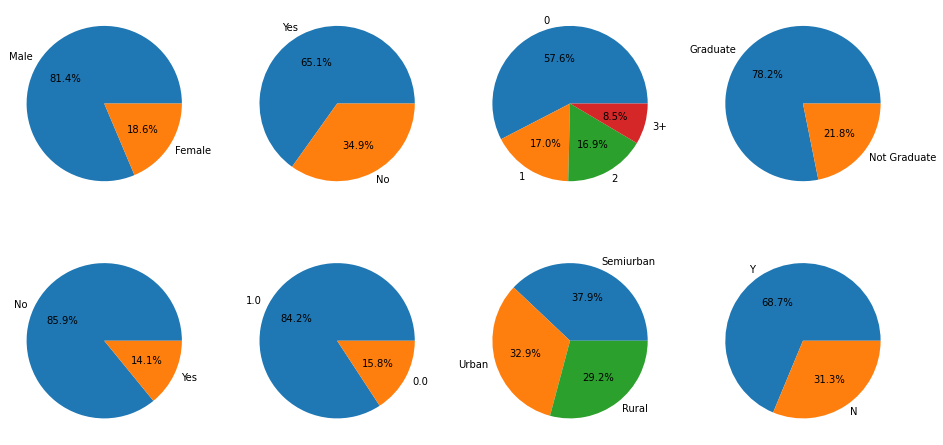

In [10]:
# pie chart for categorical variables
fig, ax = plt.subplots(2,4,figsize=(16,8))
plt.subplot(2,4,1)
plt.pie(train['Gender'].value_counts(),labels = train['Gender'].value_counts().keys(),autopct = "%0.1f%%")
plt.subplot(2,4,2)
plt.pie(train['Married'].value_counts(),labels = train['Married'].value_counts().keys(),autopct = "%0.1f%%")
plt.subplot(2,4,3)
plt.pie(train['Dependents'].value_counts(),labels = train['Dependents'].value_counts().keys(),autopct = "%0.1f%%")
plt.subplot(2,4,4)
plt.pie(train['Education'].value_counts(),labels = train['Education'].value_counts().keys(),autopct = "%0.1f%%")
plt.subplot(2,4,5)
plt.pie(train['Self_Employed'].value_counts(),labels = train['Self_Employed'].value_counts().keys(),autopct = "%0.1f%%")
plt.subplot(2,4,6)
plt.pie(train['Credit_History'].value_counts(),labels = train['Credit_History'].value_counts().keys(),autopct = "%0.1f%%")
plt.subplot(2,4,7)
plt.pie(train['Property_Area'].value_counts(),labels = train['Property_Area'].value_counts().keys(),autopct = "%0.1f%%")
plt.subplot(2,4,8)
plt.pie(train['Loan_Status'].value_counts(),labels = train['Loan_Status'].value_counts().keys(),autopct = "%0.1f%%")
plt.show()

Conclusion:
1. Male applicants are more than female applicants.
2. Married applicants are more than non-married applicants.
3. Dependents with more than 3 applicants is less than dependents with less than 3.
4. Graduate applicants are more than non-graduate applicants.
5. Self-employed applicants are less than non self-employed applicants.
6. Credit history with 0.0 applicants are less than that of 1.0.
7. The applicants whose property area is semiurban are higher in number.
8. Many of the applicants are eligible for the loan.

Histogram and Box Plot of Applicant Income

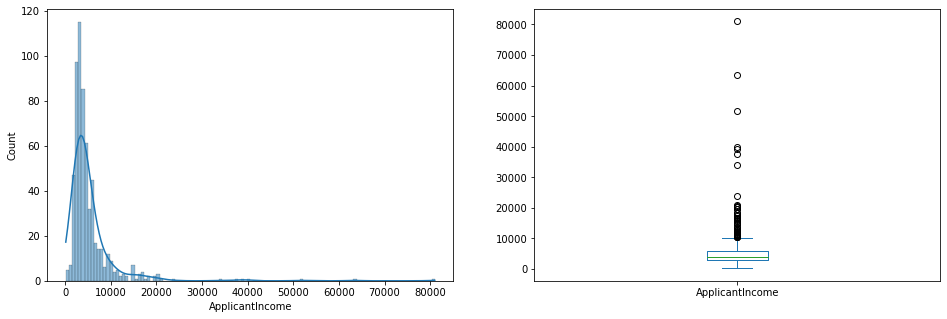

In [11]:
fig, ax = plt.subplots(1,2,figsize=(8,10))
plt.subplot(1,2,1)
sns.histplot(train['ApplicantIncome'],kde = True)
plt.subplot(1,2,2)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Histogram and Box Plot of Co-applicant Income

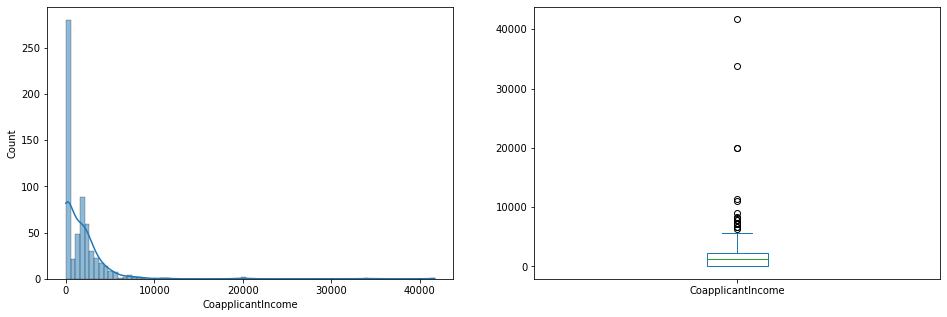

In [12]:
fig, ax = plt.subplots(1,2,figsize=(8,10))
plt.subplot(1,2,1)
sns.histplot(train['CoapplicantIncome'],kde = True)
plt.subplot(1,2,2)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Histogram and Box Plot of Loan Income

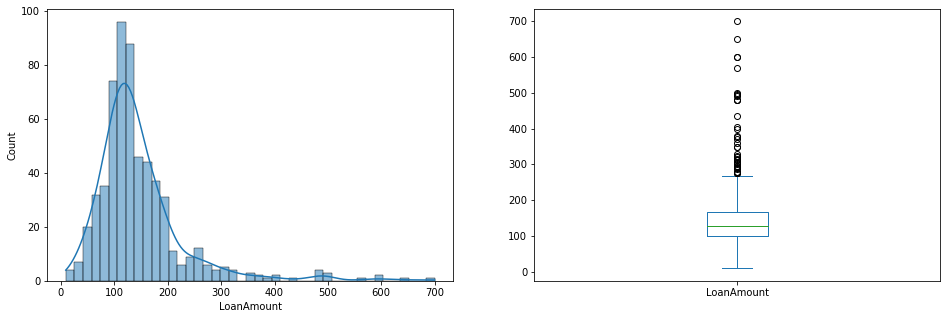

In [13]:
fig, ax = plt.subplots(1,2,figsize=(8,10))
plt.subplot(1,2,1)
sns.histplot(train['LoanAmount'],kde = True)
plt.subplot(1,2,2)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

- Histogram represents that the loan amount is left skewed as the density is more at left side.
- Box plots are representing the outliers present in the dataset.

Representing heatmap with missing values

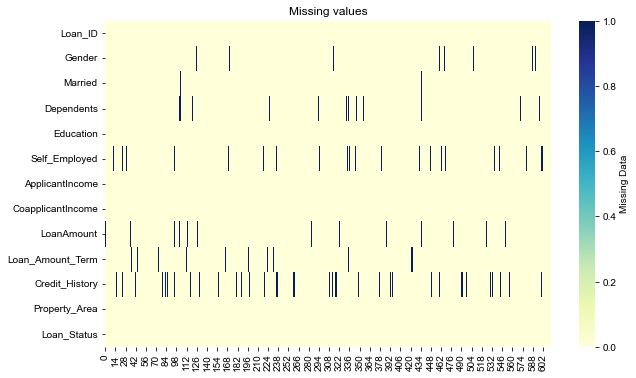

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title("Missing values")
sns.set(font_scale=1)

# Bivariate Analysis

Independent Variable vs Target Variable

<AxesSubplot:xlabel='Gender'>

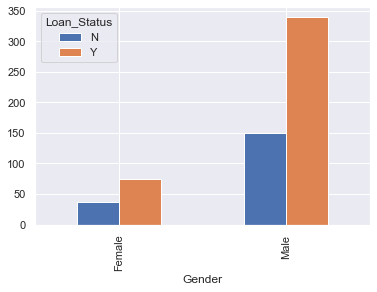

In [15]:
pd.crosstab(train['Gender'],train['Loan_Status']).plot(kind='bar')

<AxesSubplot:xlabel='Married'>

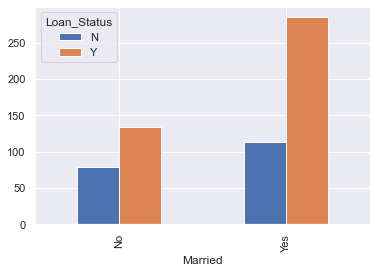

In [16]:
pd.crosstab(train['Married'],train['Loan_Status']).plot(kind='bar')

<AxesSubplot:xlabel='Self_Employed'>

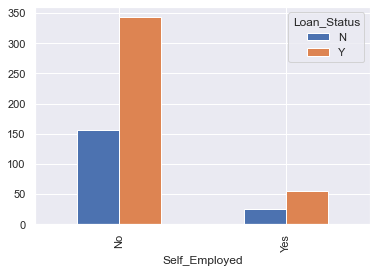

In [17]:
pd.crosstab(train['Self_Employed'],train['Loan_Status']).plot(kind='bar')

<AxesSubplot:xlabel='Credit_History'>

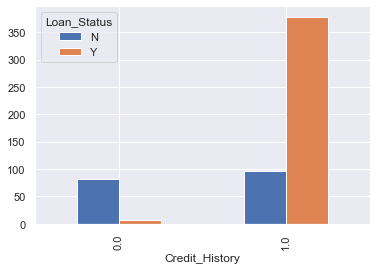

In [18]:
pd.crosstab(train['Credit_History'],train['Loan_Status']).plot(kind='bar')

<AxesSubplot:xlabel='Dependents'>

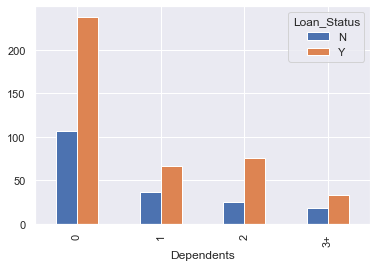

In [19]:
pd.crosstab(train['Dependents'],train['Loan_Status']).plot(kind='bar')

<AxesSubplot:xlabel='Property_Area'>

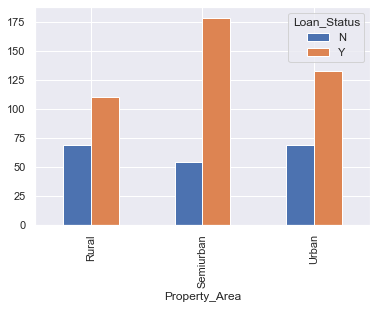

In [20]:
pd.crosstab(train['Property_Area'],train['Loan_Status']).plot(kind='bar')

<AxesSubplot:xlabel='Education'>

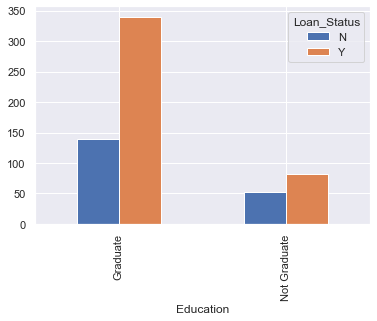

In [21]:
pd.crosstab(train['Education'],train['Loan_Status']).plot(kind='bar')

- More number of male applicants are approved for the loan than the female applicants.
- The more number of married applicants are approved of the loan.
- The less number of self employed customer’s are being sanctioned the loan than self employed.
- Maximum of the customers with credit history 1 are found to be eligible for the loan.
- The customer with 0 dependant are being sanctioned the loan.
- The graduates are eligible for the loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

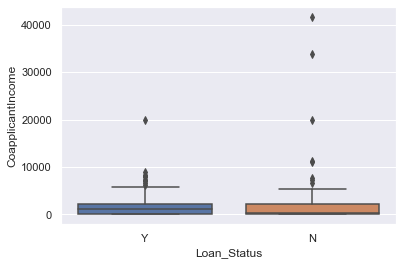

In [22]:
sns.boxplot(x = 'Loan_Status', y = 'CoapplicantIncome',data = train)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

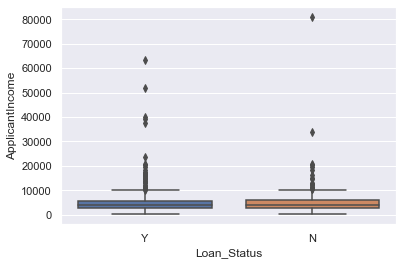

In [23]:
sns.boxplot(x = 'Loan_Status', y = 'ApplicantIncome',data = train)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

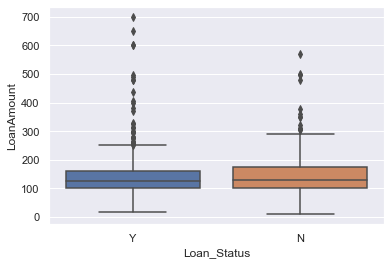

In [24]:
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount',data = train)

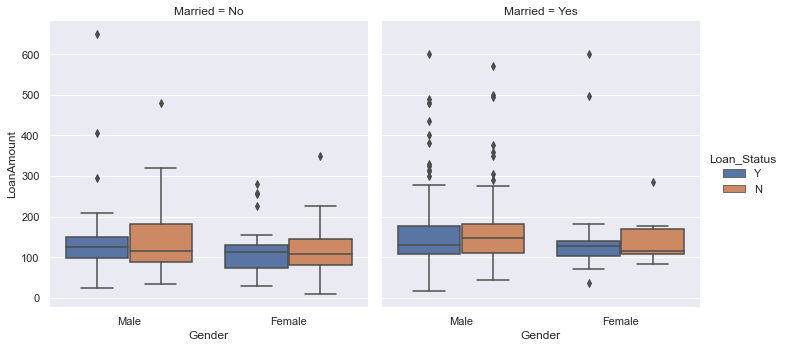

In [25]:
sns.catplot(x = 'Gender', y = 'LoanAmount', data = train, kind = 'box',hue = 'Loan_Status',col = 'Married')

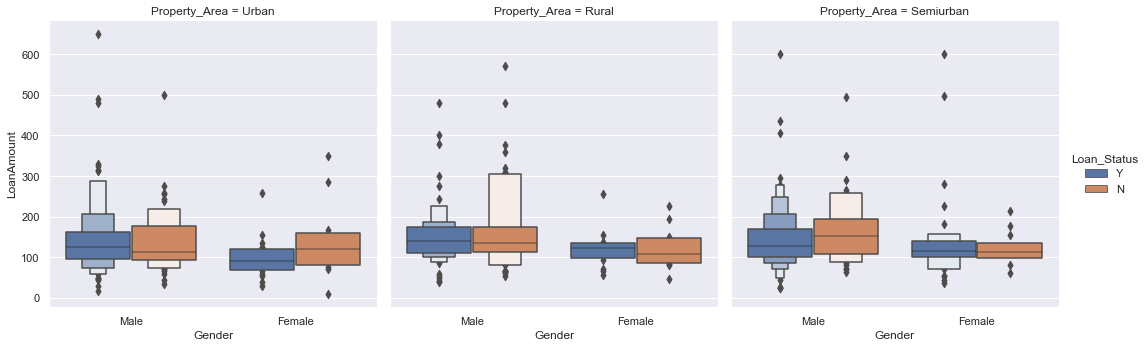

In [26]:
sns.catplot(x = 'Gender', y = 'LoanAmount', data = train, kind = 'boxen',hue = 'Loan_Status',col = 'Property_Area')

## Correlation matrix
A correlation matrix is a matrix that displays the correlation coefficients
between variables. It is used to examine the relationship between multiple
variables in a dataset. Each cell in the matrix represents the correlation
between two variables, and the correlation coefficient value ranges from -1
to 1.

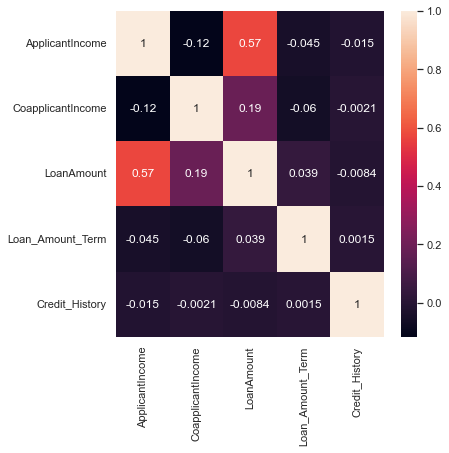

In [27]:
plt.figure(figsize = (6,6))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix,annot = True)
plt.show()

# Data Preprocessing

In [28]:
# returns the count of null values present
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Imputing these missing values using different statistical measures

In [29]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)

In [30]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)

In [32]:
# returns the shape of dataframe in (rows,columns)
train.shape

(614, 13)

Dropping the Loan_ID column 

In [33]:
train.drop('Loan_ID',axis=1,inplace = True)
test.drop('Loan_ID',axis= 1,inplace = True)

In [34]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [35]:
train.shape

(614, 12)

Representing heatmap after imputing missing values

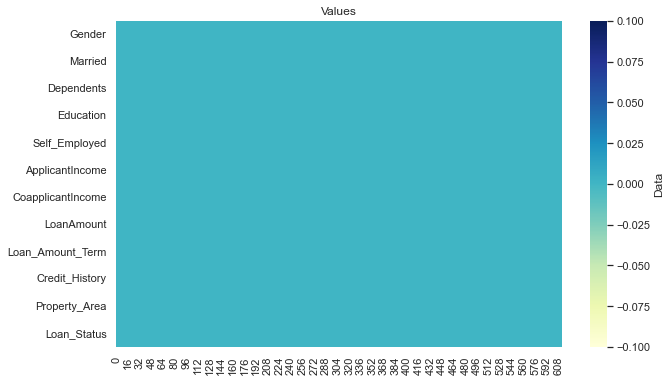

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Data'})
plt.title("Values")
sns.set(font_scale=1)

Outlier treatment using log transformation

<AxesSubplot:>

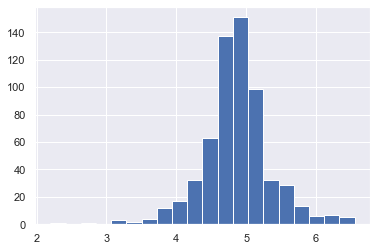

In [37]:
train['LoanAmount'] = np.log(train['LoanAmount'])
train['LoanAmount'].hist(bins=20)

In [38]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,4.986426,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,Y


Creating dummies for the categorical variables

In [39]:
train = pd.get_dummies(train,columns = ['Gender','Dependents','Married','Education','Self_Employed','Property_Area'])
test = pd.get_dummies(test,columns = ['Gender','Dependents','Married','Education','Self_Employed','Property_Area'])

In [40]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Dependents_0,Dependents_1,...,Dependents_3+,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,4.986426,360.0,1.0,Y,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
1,4583,1508.0,4.852030,360.0,1.0,N,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
2,3000,0.0,4.189655,360.0,1.0,Y,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
3,2583,2358.0,4.787492,360.0,1.0,Y,0,1,1,0,...,0,0,1,0,1,1,0,0,0,1
4,6000,0.0,4.948760,360.0,1.0,Y,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Loan_Status              614 non-null    object 
 6   Gender_Female            614 non-null    uint8  
 7   Gender_Male              614 non-null    uint8  
 8   Dependents_0             614 non-null    uint8  
 9   Dependents_1             614 non-null    uint8  
 10  Dependents_2             614 non-null    uint8  
 11  Dependents_3+            614 non-null    uint8  
 12  Married_No               614 non-null    uint8  
 13  Married_Yes              614 non-null    uint8  
 14  Education_Graduate       6

Mapping values of Loan_Status Y and N to the integers

In [42]:
train['Loan_Status'] = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

In [43]:
X = train.drop('Loan_Status',axis=1)
Y = train.Loan_Status

Handling imbalanced data.\
This can be done in following ways:
1. undersampling the majority class
2. oversampling the minority class by duplication
3. oversampling the minority class by SMOTE
4. Ensemble method

In [44]:
sm = SMOTE(random_state = 0)
X, Y = sm.fit_resample(X, Y)

In [45]:
X.shape

(844, 20)

In [46]:
Y.shape

(844,)

In [47]:
Y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

Splitting the dataset into training and testing

In [48]:
# training size is 80% and testing size is 20%
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

# 1. Logistic Regression Model

In [49]:
# create object for the model
lr = LogisticRegression(random_state = 45)
lr.fit(x_train,y_train)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=45)

Predicting the values using model

In [50]:
lr_y_pred = lr.predict(x_test)
lr_y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

Accuracy score 

In [51]:
lr_score = accuracy_score(y_test,lr_y_pred) 
lr_score

0.8005680473372782

Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score:0.8005680473372782')

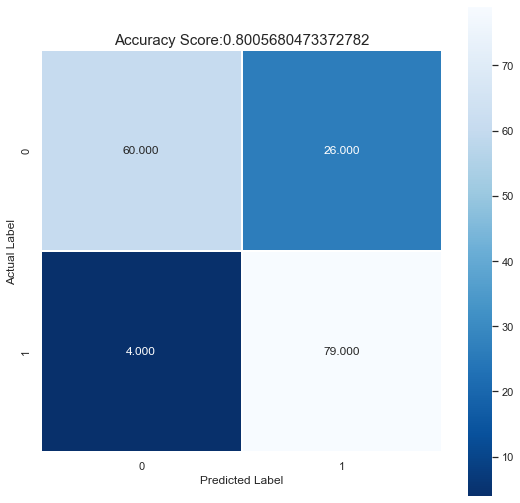

In [52]:
cm = metrics.confusion_matrix(y_test,lr_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True,fmt = ".3f",linewidths = .2,square = True,cmap = "Blues_r")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(lr_score)
plt.title(all_sample_title,size=15)

In [53]:
lr_sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', lr_sensitivity )
lr_specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', lr_specificity)

Sensitivity :  0.6976744186046512
Specificity :  0.9518072289156626


Classification Report

In [54]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80        86
           1       0.75      0.95      0.84        83

    accuracy                           0.82       169
   macro avg       0.84      0.82      0.82       169
weighted avg       0.85      0.82      0.82       169



Predicting the values of testing dataset

In [55]:
pred = lr.predict(test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

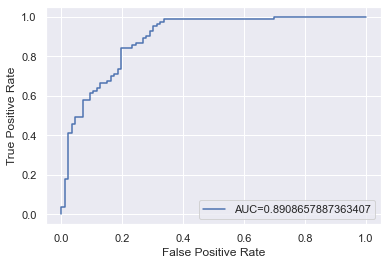

In [56]:
lr_y_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, lr_y_proba)
auc = metrics.roc_auc_score(y_test, lr_y_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# 2. Naive Baye's Classifier

In [57]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [58]:
gnb_y_pred = gnb.predict(x_test)
gnb_y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

Accuracy Score

In [59]:
gnb_score = accuracy_score(y_test,gnb_y_pred)
gnb_score

0.8106508875739645

Confusion matrix of Naive Bayes Classifier

Text(0.5, 1.0, 'Accuracy Score:0.8106508875739645')

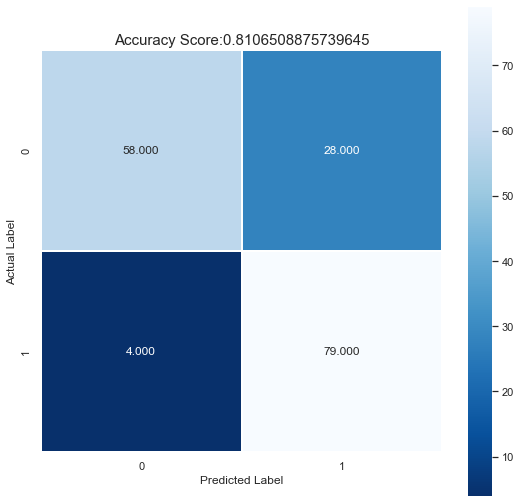

In [60]:
cm = metrics.confusion_matrix(y_test,gnb_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True,fmt = ".3f",linewidths = .2,square = True,cmap = "Blues_r")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(gnb_score)
plt.title(all_sample_title,size=15)

In [61]:
gnb_sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', gnb_sensitivity )
gnb_specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', gnb_specificity)

Sensitivity :  0.6744186046511628
Specificity :  0.9518072289156626


In [62]:
print(classification_report(y_test,gnb_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78        86
           1       0.74      0.95      0.83        83

    accuracy                           0.81       169
   macro avg       0.84      0.81      0.81       169
weighted avg       0.84      0.81      0.81       169



Predicting the values of testing dataset

In [63]:
pred = gnb.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 3. KNN(KNeighboursClassifier)

In [64]:
knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski', p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
knn_y_pred = knn.predict(x_test)
knn_y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

Accuracy score

In [66]:
knn_score = accuracy_score(y_test,knn_y_pred)
knn_score

0.5857988165680473

Confusion matrix

Text(0.5, 1.0, 'Accuracy Score:0.5857988165680473')

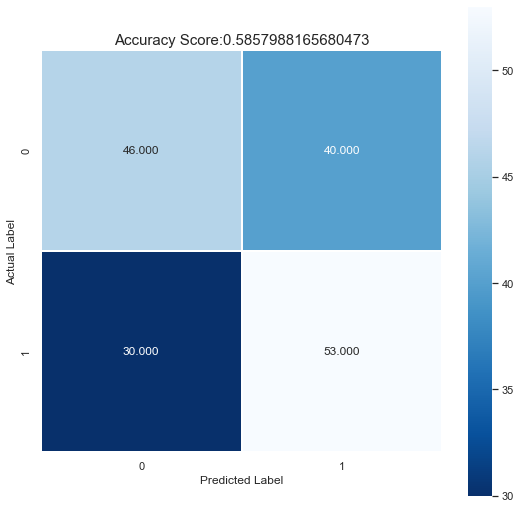

In [67]:
cm = metrics.confusion_matrix(y_test,knn_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True,fmt = ".3f",linewidths = .2,square = True,cmap = "Blues_r")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(knn_score)
plt.title(all_sample_title,size=15)

In [68]:
knn_sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', knn_sensitivity )
knn_specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', knn_specificity)

Sensitivity :  0.5348837209302325
Specificity :  0.6385542168674698


In [69]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.61      0.53      0.57        86
           1       0.57      0.64      0.60        83

    accuracy                           0.59       169
   macro avg       0.59      0.59      0.59       169
weighted avg       0.59      0.59      0.58       169



Predicting the values of testing dataset

In [70]:
pred = knn.predict(test)
pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,

# 4. Adaboost Classifier

In [71]:
base_classifier = DecisionTreeClassifier(max_depth = 3)
ada_classifier = AdaBoostClassifier(
    base_estimator = base_classifier,
    n_estimators = 60,
    learning_rate=0.25,
    random_state = 0
)

In [72]:
ada_classifier.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.25, n_estimators=60, random_state=0)

In [73]:
ada_y_pred = ada_classifier.predict(x_test)
ada_y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

Accuracy Score

In [74]:
ada_score = accuracy_score(y_test,ada_y_pred)
ada_score

0.7810650887573964

Confusion matrix 

Text(0.5, 1.0, 'Accuracy Score:0.7810650887573964')

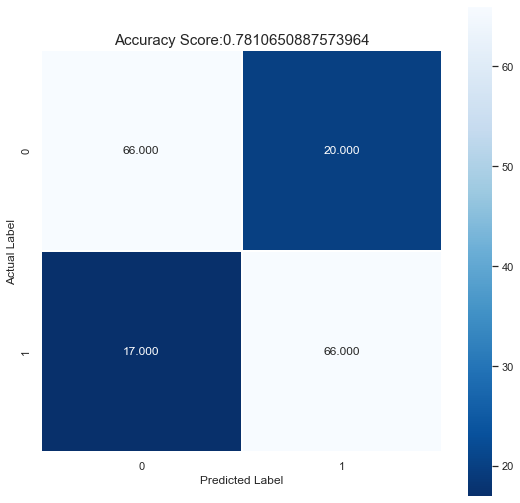

In [75]:
cm = metrics.confusion_matrix(y_test,ada_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True,fmt = ".3f",linewidths = .2,square = True,cmap = "Blues_r")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(ada_score)
plt.title(all_sample_title,size=15)

In [76]:
ada_sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', ada_sensitivity )
ada_specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', ada_specificity)

Sensitivity :  0.7674418604651163
Specificity :  0.7951807228915663


In [77]:
print(classification_report(y_test,ada_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        86
           1       0.77      0.80      0.78        83

    accuracy                           0.78       169
   macro avg       0.78      0.78      0.78       169
weighted avg       0.78      0.78      0.78       169



Predicting the values of testing dataset

In [78]:
pred = ada_classifier.predict(test)
pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,

# 5. Gradientboost Classifier

In [79]:
grad_classifier = GradientBoostingClassifier(
    n_estimators = 60,
    learning_rate=0.25,
    random_state = 0
)

In [80]:
grad_classifier.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.25, n_estimators=60, random_state=0)

In [81]:
grad_y_pred = grad_classifier.predict(x_test)
grad_y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

Accuracy Score

In [82]:
grad_score = accuracy_score(y_test,grad_y_pred)
grad_score

0.8165680473372781

Text(0.5, 1.0, 'Accuracy Score:0.8165680473372781')

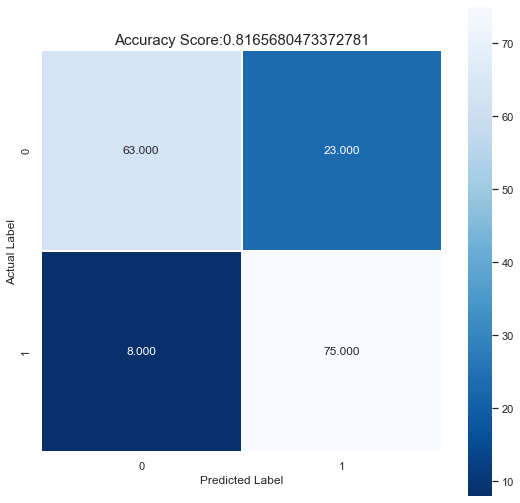

In [83]:
cm = metrics.confusion_matrix(y_test,grad_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True,fmt = ".3f",linewidths = .2,square = True,cmap = "Blues_r")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(grad_score)
plt.title(all_sample_title,size=15)

In [84]:
grad_sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', grad_sensitivity )
grad_specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', grad_specificity)

Sensitivity :  0.7325581395348837
Specificity :  0.9036144578313253


In [85]:
print(classification_report(y_test,grad_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        86
           1       0.77      0.90      0.83        83

    accuracy                           0.82       169
   macro avg       0.83      0.82      0.82       169
weighted avg       0.83      0.82      0.82       169



Predicting the values of testing dataset

In [86]:
pred = grad_classifier.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

# 6. SVM

In [87]:
classifier = SVC(kernel='linear')  
classifier.fit(x_train, y_train)  

SVC(kernel='linear')

In [88]:
svc_y_pred = classifier.predict(x_test)
svc_y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

Accuracy Score

In [89]:
svm_score = accuracy_score(y_test,svc_y_pred)
svm_score

0.8165680473372781

Text(0.5, 1.0, 'Accuracy Score:0.8165680473372781')

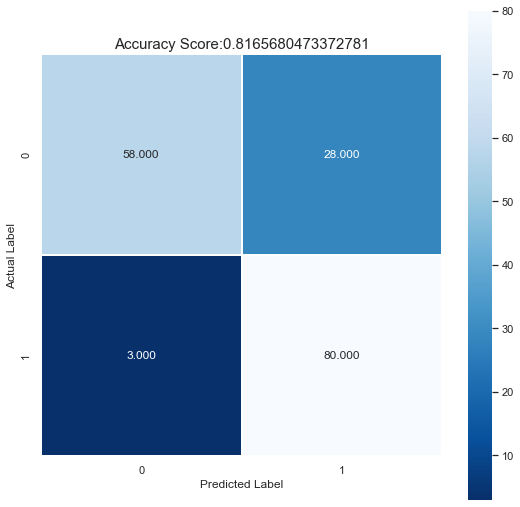

In [90]:
cm = metrics.confusion_matrix(y_test,svc_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True,fmt = ".3f",linewidths = .2,square = True,cmap = "Blues_r")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(svm_score)
plt.title(all_sample_title,size=15)

In [91]:
svm_sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', svm_sensitivity )
svm_specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', svm_specificity)

Sensitivity :  0.6744186046511628
Specificity :  0.963855421686747


In [92]:
print(classification_report(y_test,svc_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.67      0.79        86
           1       0.74      0.96      0.84        83

    accuracy                           0.82       169
   macro avg       0.85      0.82      0.81       169
weighted avg       0.85      0.82      0.81       169



Predicting the values of testing dataset

In [93]:
pred = classifier.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Comparing the algorithms

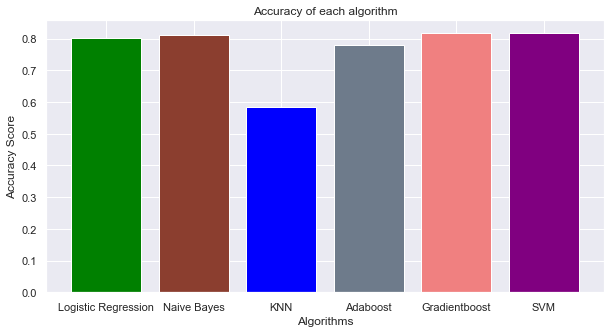

In [94]:
fig = plt.figure(figsize = (10, 5))
algo = ['Logistic Regression','Naive Bayes','KNN','Adaboost','Gradientboost','SVM']
score = [lr_score,gnb_score,knn_score,ada_score,grad_score,svm_score]
plt.bar(algo,score,color=['green', '#8B3E2F', 'blue', '#6E7B8B', '#F08080','purple'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of each algorithm')
plt.show()

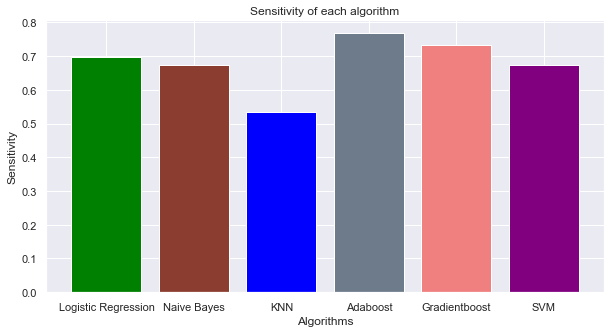

In [95]:
fig = plt.figure(figsize = (10, 5))
sensitivity = [lr_sensitivity,gnb_sensitivity,knn_sensitivity,ada_sensitivity,grad_sensitivity,svm_sensitivity]
plt.bar(algo,sensitivity,color=['green', '#8B3E2F', 'blue', '#6E7B8B', '#F08080','purple'])
plt.xlabel('Algorithms')
plt.ylabel('Sensitivity')
plt.title('Sensitivity of each algorithm')
plt.show()

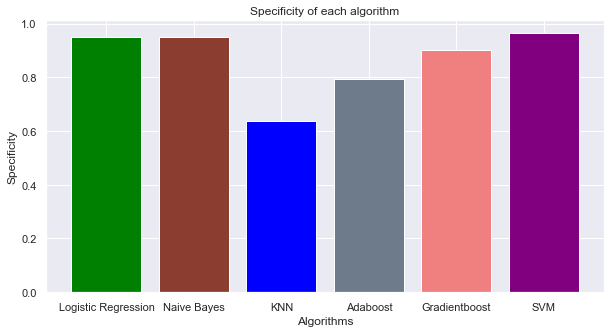

In [96]:
fig = plt.figure(figsize = (10, 5))
specificity = [lr_specificity,gnb_specificity,knn_specificity,ada_specificity,grad_specificity,svm_specificity]
plt.bar(algo,specificity,color=['green', '#8B3E2F', 'blue', '#6E7B8B', '#F08080','purple'])
plt.xlabel('Algorithms')
plt.ylabel('Specificity')
plt.title('Specificity of each algorithm')
plt.show()